## NILMTK Rapid Experimentation API

In [1]:
from nilmtk import DataSet

ds = DataSet('dsual.h5')

print("Available buildings:", ds.buildings)
elec = ds.buildings[1].elec
print("Mains:", elec.mains())
print("Appliances disponibles:")
for app in elec.appliances:
    print(app)
print("Available current types:", elec.mains().available_ac_types('power'))



Available buildings: OrderedDict([(1, Building(instance=1, dataset='DSUAL'))])
Mains: ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
Appliances disponibles:
Appliance(type='vacuum cleaner', instance=1)
Appliance(type='television', instance=1)
Appliance(type='boiler', instance=1)
Appliance(type='freezer', instance=1)
Appliance(type='fan', instance=1)
Available current types: ['active', 'apparent', 'reactive']


In [2]:
pip show nilmtk

Name: nilmtk
Version: 0.4.0.dev1+git.303d45b
Summary: Estimate the energy consumed by individual appliances from whole-house power meter readings
Home-page: https://github.com/nilmtk/nilmtk
Author: NILMTK developers
Author-email: 
License: Apache 2.0
Location: /home/carlos/nilmtk_env/lib/python3.7/site-packages
Requires: hmmlearn, jupyterlab, matplotlib, networkx, numpy, pandas, pyyaml, scikit-learn, scipy, tables
Required-by: nilmtk-contrib
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show nilmtk_contrib

Name: nilmtk-contrib
Version: 0.1.2.dev1+git.0dd2ef5
Summary: State-of-the-art algorithms for the task of energy disaggregation implemented using NILMTK's Rapid Experimentation API
Home-page: https://github.com/nilmtk/nilmtk-contrib
Author: NILMTK-contrib developers
Author-email: 
License: Apache 2.0
Location: /home/carlos/nilmtk_env/lib/python3.7/site-packages
Requires: cvxpy, nilmtk, tensorflow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show nilm_metadata

Name: nilm-metadata
Version: 0.2.5
Summary: Concatenate NILM metadata
Home-page: https://github.com/nilmtk/nilm_metadata
Author: Jack Kelly
Author-email: jack.kelly@imperial.ac.uk
License: MIT
Location: /home/carlos/nilmtk_env/lib/python3.7/site-packages
Requires: pandas, PyYAML, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

In [6]:
import keras
print("Keras version:", keras.__version__)  # Print the installed Keras version

# import tensorflow.keras as tf_keras
# print(tf_keras.__version__)  # (Commented out) Print the TensorFlow Keras version if needed

import numpy as np
import pandas as pd

print("NumPy version:", np.__version__)    # Print the NumPy version (e.g., 1.21.6; in the nilmtk environment it is 1.19.5)
print("Pandas version:", pd.__version__)   # Print the Pandas version (e.g., 0.25.3; same version in nilmtk environment)

import matplotlib as plt
print("Matplotlib version:", plt.__version__)  # Print the Matplotlib version (e.g., 3.2.2; same in nilmtk environment)

import sklearn as sl
print("Scikit-Learn version:", sl.__version__)  # Print the Scikit-Learn version

import tables as tl
print("Tables version:", tl.__version__)  # Print the PyTables version


Using TensorFlow backend.


Keras version: 2.2.4
NumPy version: 1.19.5
Pandas version: 0.25.3
Matplotlib version: 3.1.3
Scikit-Learn: 0.24.2
Tables version: 3.6.1


In [7]:
import nilmtk
print(nilmtk.__version__)

0.4.0.dev1+git.303d45b


In [8]:
import nilm_metadata
print(nilm_metadata.__version__)

0.2.5.dev-7ed4bab


In [9]:
import nilmtk_contrib
print(nilmtk_contrib.__version__)

0.1.2.dev1+git.0dd2ef5


In [11]:
import nilm_metadata

#  Dataset 

In [ ]:
#dataset od reference created with ozmv1  (DSUALMH) 
ompm = DataSet('dsual.h5')
print_dict(ompm.metadata)  #metadata of  dataset

In [13]:
elec = ompm.buildings[1].elec  # Access the electricity object (elec) of the second building in the 'buildings' collection of the 'ompm' object
elec.get_timeframe()           # Call the 'get_timeframe()' method of the 'elec' object to get the timeframe of the electrical data


TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

In [6]:
from nilmtk import DataSet  # Import the DataSet class from the nilmtk library

ds = DataSet("dsual.h5")  # Load the dataset from the file 'dsual.h5'
elec = ds.buildings[1].elec  # Access the electricity meter data for building 1

print("Available appliances:", elec.appliances)  # Print the list of available appliances
print("Available power metrics:", elec.available_power_ac_types())  # Print the available power metrics (e.g., active, reactive power)

ds.store.close()  # Close the dataset to free resources


from nilmtk import DataSet  # Import the DataSet class again (optional if already imported)

ds = DataSet('dsual.h5')  # Load the dataset again from the same file
for app in ds.buildings[1].elec.appliances:  # Iterate over each appliance in building 1's electricity meter
    print(app)  # Print the appliance object (usually shows type and identifier)



Available appliances: [Appliance(type='vacuum cleaner', instance=1), Appliance(type='television', instance=1), Appliance(type='boiler', instance=1), Appliance(type='freezer', instance=1), Appliance(type='fan', instance=1)]
Available power metrics: ['reactive', 'apparent', 'active']
Appliance(type='vacuum cleaner', instance=1)
Appliance(type='television', instance=1)
Appliance(type='boiler', instance=1)
Appliance(type='freezer', instance=1)
Appliance(type='fan', instance=1)


In [15]:
from nilmtk import DataSet  # Import the DataSet class from the nilmtk library

ds = DataSet('dsual.h5')  # Load the dataset from the file 'dsual.h5'

# Iterate over each appliance in the electricity meter of building 1
for app in ds.buildings[1].elec.appliances:
    print(app)  # Print the appliance object (usually shows appliance type and identifier)


Appliance(type='boiler', instance=1)
Appliance(type='fan', instance=1)
Appliance(type='television', instance=1)
Appliance(type='vacuum cleaner', instance=1)
Appliance(type='freezer', instance=1)


In [16]:
from nilmtk import DataSet  # Import the DataSet class from the nilmtk library

dataset = DataSet('dsual.h5')  # Load the dataset from the file 'dsual.h5'
elec = dataset.buildings[1].elec  # Access the electricity meter data for building 1

# Get the list of appliances
for appliance in elec.appliances:
    print(appliance.label())  # Print the label (name) of each appliance


('boiler', 1)
('fan', 1)
('television', 1)
('vacuum cleaner', 1)
('freezer', 1)


In [17]:
# Inspect the available appliances
from nilmtk import DataSet

# Open the dataset
ds = DataSet('dsual.h5')

# Iterate over the available appliances
for appliance in ds.buildings[1].elec.appliances:
    print(f"Appliance: {appliance.type}, Identifier: {appliance.identifier}")

# Close the dataset
ds.store.close()


Appliance: {'parent': 'heating appliance', 'min_on_duration': 20, 'min_off_duration': 20, 'type': 'boiler', 'n_ancestors': 2, 'categories': {'traditional': 'heating', 'size': 'large', 'google_shopping': ['climate control', 'furnaces and boilers'], 'electrical': ['single-phase induction motor']}, 'description': 'all boilers except for electric boilers', 'on_power_threshold': 40, 'synonyms': ['furnace'], 'components': [{'type': 'water pump', 'parent': 'motor', 'n_ancestors': 2, 'categories': {'electrical': ['single-phase induction motor']}}], 'additional_properties': {'fuel': {'enum': ['natural gas', 'coal', 'wood', 'oil', 'LPG']}}, 'subtypes': ['combi', 'system'], 'control': ['manual', 'timer', 'thermostat'], 'distributions': {'room': [{'distribution_of_data': {'categories': ['bathroom', 'utility', 'kitchen'], 'values': [0.3, 0.2, 0.2]}, 'source': 'subjective', 'from_appliance_type': 'boiler', 'distance': 0}]}}, Identifier: ApplianceID(type='boiler', instance=1)
Appliance: {'parent': 'm

In [18]:
from nilmtk import DataSet  # Import the DataSet class from the nilmtk library

ds = DataSet('dsual.h5')   # Load the dataset from the file 'dsual.h5'

print(ds.buildings[1].elec.appliances)  # Print the list of appliances available in the electricity meter of building 1



[Appliance(type='boiler', instance=1), Appliance(type='fan', instance=1), Appliance(type='television', instance=1), Appliance(type='vacuum cleaner', instance=1), Appliance(type='freezer', instance=1)]


Metrics not supported in nilmtk_contrib:

-mneap

-f1

-precision

-recall

-accuracy

-eae

#  ALGORITHMS INCLUDED IN NILMTK (not included in nilmtk-contrib)

In [19]:
from nilmtk.disaggregate import Hart85  # Import the Hart85 disaggregation algorithm from nilmtk
from nilmtk.disaggregate import Mean    # Import the Mean disaggregation algorithm from nilmtk
from nilmtk.disaggregate import CO      # Import the Combinatorial Optimization (CO) disaggregation algorithm from nilmtk
from nilmtk.disaggregate import FHMMExact  # Import the Exact Factorial Hidden Markov Model (FHMMExact) disaggregation algorithm from nilmtk



In [20]:
from nilmtk import DataSet  # Import the DataSet class from the nilmtk library

data = DataSet('dsual.h5')  # Load the dataset from the file 'dsual.h5'

print(data.metadata)        # Print the metadata of the dataset, which should be a dictionary if available


{'name': 'DSUAL', 'long_name': 'The Reference Energy Disaggregation Data set of the ALmeria University', 'creators': 'crn56', 'publication_date': 2021, 'institution': None, 'contact': 'crn565@inlumine.ual.es', 'description': None, 'subject': 'Disaggregated power demand from domestic buildings.', 'number_of_buildings': 1, 'timezone': 'Europe/Berlin', 'geo_location': {'locality': 'Almeria', 'country': 'ES', 'latitude': 36.83814, 'longitude': -2.45974}, 'related_documents': None, 'meter_devices': {'OZM': {'model': 'OZM', 'manufacturer': 'ual', 'manufacturer_url': 'https://openzmeter.com/', 'description': 'Multifunction meter for feeders', 'sample_period': 60, 'max_sample_period': 300, 'measurements': [{'physical_quantity': 'power', 'type': 'active', 'upper_limit': 10000, 'lower_limit': 0}, {'physical_quantity': 'power', 'type': 'apparent', 'upper_limit': 10000, 'lower_limit': 0}, {'physical_quantity': 'power', 'type': 'reactive', 'upper_limit': 10000, 'lower_limit': 0}, {'physical_quantit

In [2]:
import pandas as pd  # Import the pandas library

input_file = 'dsual.h5'  # Change to your actual file name

# Open the HDF5 file in read mode using pandas HDFStore
with pd.HDFStore(input_file, mode='r') as store:
    print("Keys found in the HDF5 file:")
    # Iterate over all keys (datasets/groups) in the HDF5 file and print them
    for key in store.keys():
        print(key)



Keys found in the HDF5 file:
/building1/elec/meter1
/building1/elec/meter2
/building1/elec/meter3
/building1/elec/meter4
/building1/elec/meter5
/building1/elec/meter6


### IMPORTANT: WITH HARMONICS IT GIVES ERROR IF WE USE SAMPLING PERIODS SHORTER THAN ONE SECOND.

## Combinatorial algorithm (CO)

## DSUAL ( 1 second, no harmonics and no filters)

In [22]:
# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Inicio de medición
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, # 1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # Solo 1 electrodoméstico para prueba
      'methods': {
        'CO': CO({})
          #'methods': {"CO": CO({'on_power_threshold': 100})},#ok
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............
            CO
2    17.329212
3   543.531372
4    19.974924
5   357.611786
6  1346.499146
............  rmse  ..............
            CO
2    23.949952
3   567.516465
4    24.296503
5   528.641094
6  1415.010556
............  f1score  ..............
         CO
2  0.650631
3  0.523077
4  0.972837
5  0.686405
6  0.000000
............  nde  ..............
           CO
2    0.822980
3   18.181547
4    0.996108
5    0.929738
6  520.901184
Runtime: 1.22 seconds


## DSUALMH (  1 second,with harmonics)

In [4]:
# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Inicio de medición
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, # 1 second of sampling
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # all of the appliances
      'methods': {
        'CO': CO({})
          #'methods': {"CO": CO({'on_power_threshold': 100})},#ok
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  ..............
          CO
2   3.129063
3  20.137012
4  18.680573
5  14.408053
6  12.179466
............  rmse  ..............
          CO
2  24.985226
3  25.190260
4  34.359693
5  21.240706
6  20.851452
............  f1score  ..............
         CO
2  0.000000
3  0.552239
4  0.639161
5  0.897122
6  0.999392
............  nde  ..............
         CO
2  9.197694
3  0.865600
4  1.100783
5  0.870827
6  0.036672
Runtime: 1.30 seconds


In [25]:
from nilmtk import DataSet  # Import the DataSet class from the nilmtk library

dataset = DataSet('dsualmh.h5')  # Load the dataset from the file 'dsualmh.h5'
elec = dataset.buildings[1].elec  # Access the electricity meter data for building 1

# Display the mapping of meters to appliance names
for appliance in elec.appliances:
    print(appliance)  # Print each appliance object (typically shows type and identifier)



Appliance(type='boiler', instance=1)
Appliance(type='television', instance=1)
Appliance(type='freezer', instance=1)
Appliance(type='vacuum cleaner', instance=1)
Appliance(type='fan', instance=1)



##  Graphics, 1 second, no harmonics


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
Estimating power demand for '2'
Estimating power demand for '3'
Estimating power demand for '4'
Estimating power demand for '5'
Estimating power demand for '6'
Runtime: 1.22 seconds


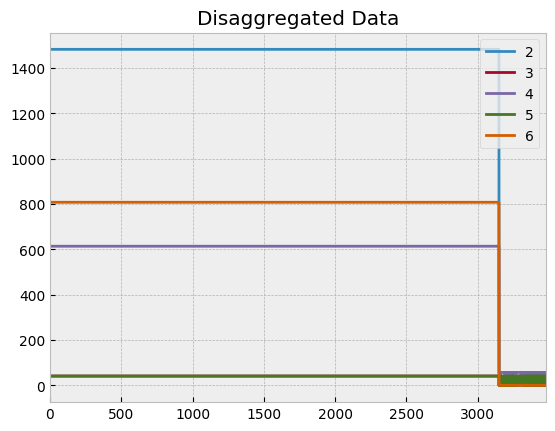

In [49]:
# First, let's inspect the available appliances
from nilmtk import DataSet

# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Inicio de medición
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # 
      'methods': {
        'CO': CO({})
          #'methods': {"CO": CO({'on_power_threshold': 100})},#ok
    },
    'site_only':True,
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

# MEAN

## DSUAL  with harmonics, 1 second

In [41]:
# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start measurement
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # 
      'methods': {
        'Mean': Mean(params={'on_power_threshold': 0})  
       },
   'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measure
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Mean
............  mae  ..............
         Mean
2  739.738098
3   17.812302
4   23.957594
5   15.209436
6  410.741425
............  rmse  ..............
         Mean
2  739.738129
3   17.850103
4   27.862093
5   15.219094
6  410.957989
............  f1score  ..............
       Mean
2  0.000000
3  0.643539
4  0.515042
5  0.987047
6  0.642216
............  nde  ..............
         Mean
2  272.316315
3    0.613374
4    0.892619
5    0.623953
6    0.722765
Runtime: 0.76 seconds


   ## Without harmonics , 1 second

In [26]:
 # First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Inicio de medición
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #1 second
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # all of the appliances
      'methods': {
        'Mean': Mean(params={'on_power_threshold': 0})  # 
       },
   'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Mean
............  mae  ..............
          Mean
2    17.829130
3    25.198105
4    20.844482
5   410.917450
6  1462.482178
............  rmse  ..............
          Mean
2    17.866873
3    29.397846
4    24.440057
5   411.089064
6  1462.482051
............  f1score  ..............
       Mean
2  0.643539
3  0.515042
4  0.987047
5  0.642216
6  0.000000
............  nde  ..............
         Mean
2    0.613950
3    0.941820
4    1.001994
5    0.722996
6  538.376648
Runtime: 0.49 seconds


## Graphic, harmonics, no filter, 1 second

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Mean
Runtime: 0.42 seconds


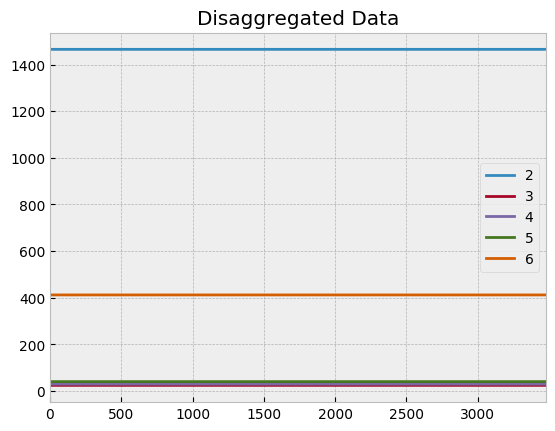

In [51]:
# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Inicio de medición
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #1 second of sampling
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # all of the appliances
      'methods': {
        'Mean': Mean(params={'on_power_threshold': 0})  # without filter
       },
    'site_only':True,
   'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

# Hart85

In [22]:

# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")


# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Inicio de medición
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, # 1 second of sampling
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # all of the appliances
      'methods': {
        'Hart85': Hart85(params={})  # 
       },
   'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


# End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
       Hart85
2  266.436951
3  259.090851
4  272.505066
5  133.210159
6  260.898041
............  rmse  ..............
       Hart85
2  428.565886
3  427.800370
4  436.138220
5  295.530046
6  440.349240
............  f1score  ..............
     Hart85
2  0.422269
3  0.500000
4  0.503916
5  0.845317
6  0.000000
............  nde  ..............
       Hart85
2   14.726596
3   13.705457
4   17.880802
5    0.519758
6  162.103699
Runtime: 1.11 seconds


In [23]:

# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")


# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start the measurement
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, # 1 second of sampling
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # all of the appliances
      'methods': {
        'Hart85': Hart85(params={})  # 
       },
   'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Hart85
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
............  mae  ..............
       Hart85
2  260.898041
3  266.436951
4  259.090851
5  272.505066
6  133.210159
............  rmse  ..............
       Hart85
2  440.349240
3  428.565886
4  427.800370
5  436.138220
6  295.530046
............  f1score  ..............
     Hart85
2  0.000000
3  0.422269
4  0.500000
5  0.503916
6  0.845317
............  nde  ..............
       Hart85
2  162.103699
3   14.726596
4   13.705457
5   17.880802
6    0.519758
Runtime: 1.25 seconds


# FHMM_Exact

In [24]:
from nilmtk import DataSet
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
import time

warnings.filterwarnings("ignore")

# start of the measurement
start_time = time.time()

experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,#sampling rate

    'appliances': [2, 3, 4, 5, 6],# all of the measurement

    'methods': {
        'FHMMExact': FHMMExact(params={})
    },

    # cleaning the data
    'preprocessing': {
        'dropout': True,                 # Drop periods  of time without data
        'dropout_threshold': 5,         # in seconds
        'fillna': 'forward'             # Fill data to forward
    },

    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },

    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

# Run the experiment1

api_results_experiment_1 = API(experiment1)

#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
............  mae  ..............
   FHMMExact
2  14.212360
3  24.964458
4   9.653218
5  10.826104
6  14.712421
............  rmse  ..............
   FHMMExact
2  22.258011
3  29.167343
4  16.919760
5  28.235270
6  28.875613
............  f1score  ..............
   FHMMExact
2   0.314286
3   0.515042
4   0.987047
5   0.998174
6   0.000000
............  nde  ..............
   FHMMExact
2   0.764841
3   0.934435
4   0.693677
5   0.049658
6  10.629843
Runtime: 0.93 seconds


In [25]:
from nilmtk import DataSet
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
import time

warnings.filterwarnings("ignore")

# start of the measurement

start_time = time.time()

experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1, # 1 second of sampling

    'appliances': [2, 3, 4, 5, 6],#all of the appliances

    'methods': {
        'FHMMExact': FHMMExact(params={})
    },


    'preprocessing': {
        'dropout': True,                 # drop
        'dropout_threshold': 5,         # seconds
        'fillna': 'forward'             # fill na to forward
    },

    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },

    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

# Executing experiment1
api_results_experiment_1 = API(experiment1)

#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : FHMMExact
............  mae  ..............
   FHMMExact
2  14.712421
3  16.829050
4  13.914918
5  13.673829
6  10.826104
............  rmse  ..............
   FHMMExact
2  28.875613
3  24.231243
4  28.089980
5  20.184689
6  28.235270
............  f1score  ..............
   FHMMExact
2   0.000000
3   0.298039
4   0.549428
5   0.987047
6   0.998174
............  nde  ..............
   FHMMExact
2  10.629843
3   0.832646
4   0.899920
5   0.827532
6   0.049658
Runtime: 1.03 seconds


 # DEEP LEARNING ALGORITHMS
 
 THE PROBLEM IS SOLVED USING ONLY THE ACTIVE POWER


## DAE 

## graphic, harmonics, no filter, 1 second

In [26]:
from nilmtk_contrib.disaggregate import DAE
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")
import time

start_time = time.time()

experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1, #1 second of sampling

    'appliances': [2,3,4,5,6],  # all of the appliances

    'methods': {
    'DAE': DAE({'window_size': 99})  # we probe with a window size of 99
     },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },

    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

api_results_experiment_1 = API(experiment1)

#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : DAE
............  mae  ..............
            DAE
2  1.444367e+08
3  2.553090e+09
4  3.615084e+09
5  6.908374e+08
6  1.502991e+13
............  rmse  ..............
            DAE
2  1.414981e+09
3  9.877275e+09
4  1.367091e+10
5  2.801409e+09
6  5.380049e+13
............  f1score  ..............
        DAE
2  0.000000
3  0.482610
4  0.350877
5  0.610211
6  0.000000
............  nde  ..............
            DAE
2  5.208901e+08
3  3.394079e+08
4  4.379755e+08
5  1.148522e+08
6  9.462067e+10
Runtime: 21.28 seconds


In [27]:
from nilmtk_contrib.disaggregate import DAE
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")
import time

start_time = time.time()

experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1, #1 secoond of sampling

    'appliances': [2,3,4,5,6],  # all of the appliances

    'methods': {
    'DAE': DAE({'window_size': 99})  #   window size of 99
     },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },

    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

api_results_experiment_1 = API(experiment1)

#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : DAE
............  mae  ..............
            DAE
2  6.798762e+07
3  1.306088e+08
4  5.253530e+07
5  2.003308e+13
6  1.727593e+09
............  rmse  ..............
            DAE
2  4.426976e+08
3  8.055541e+08
4  2.977732e+08
5  7.130438e+13
6  9.307265e+09
............  f1score  ..............
        DAE
2  0.270418
3  0.225262
4  0.505576
5  0.000000
6  0.000000
............  nde  ..............
            DAE
2  1.521220e+07
3  2.580757e+07
4  1.220811e+07
5  1.254053e+11
6  3.426239e+09
Runtime: 27.07 seconds


# RNN

In [28]:
from nilmtk_contrib.disaggregate import RNN
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")
import time

start_time = time.time()

experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,  # 1 second of samplig

    'appliances': [2, 3, 4, 5, 6], #all of the appliances

    'methods': {
        'RNN': RNN({})  
    },

    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },

    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

api_results_experiment_1 = API(experiment1)

#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")



Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : RNN
............  mae  ..............
           RNN
2    19.344685
3    21.648640
4    16.779272
5  1204.835205
6   581.890259
............  rmse  ..............
           RNN
2    23.327776
3    33.949289
4    20.044016
5  1378.075969
6   887.226049
............  f1score  ..............
        RNN
2  0.511628
3  0.391552
4  0.674517
5  0.000000
6  0.000000
............  nde  ..............
          RNN
2    0.801601
3    1.087635
4    0.821765
5    2.423667
6  326.610352
Runtime: 682.77 seconds


In [29]:
from nilmtk_contrib.disaggregate import RNN
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")
import time

start_time = time.time()

experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1, #  1 second of sampling

    'appliances': [2, 3, 4, 5, 6], #all of the appliances

    'methods': {
        'RNN': RNN({})  # 
    },

    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },

    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

api_results_experiment_1 = API(experiment1)

#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")


Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : RNN
............  mae  ..............
           RNN
2   548.314087
3    19.031267
4    24.942883
5    16.804670
6  1356.308105
............  rmse  ..............
           RNN
2   838.279749
3    23.199372
4    37.187511
5    20.243381
6  1594.270444
............  f1score  ..............
        RNN
2  0.000000
3  0.511628
4  0.436636
5  0.674517
6  0.000000
............  nde  ..............
          RNN
2  308.591980
3    0.797188
4    1.191378
5    0.829938
6    2.803895
Runtime: 834.29 seconds


# SEQ2POINT

In [34]:
from nilmtk_contrib.disaggregate.seq2point import Seq2Point
from nilmtk.api import API
import warnings
import time

warnings.filterwarnings("ignore")

# start the measurement
start_time = time.time()

# create the instance
seq2point_model = Seq2Point({
    'sequence_length': 99,
    'n_epochs': 10,
    'batch_size': 512
})

#  defining the experimentg
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,  # 1 second of sampling
    'appliances': [2, 3, 4, 5, 6], #all of the appliances
    'methods': {
        'SEQ2POINT': seq2point_model
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

# running the experiment
api_results_experiment_1 = API(experiment1)

#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Point
............  mae  ..............
      SEQ2POINT
2  1.860385e+09
3  1.662680e+01
4  1.988515e+01
5  2.151034e+13
6  6.246682e+11
............  rmse  ..............
      SEQ2POINT
2  1.998451e+10
3  3.121387e+01
4  2.433719e+01
5  7.911150e+13
6  2.272107e+12
............  f1score  ..............
   SEQ2POINT
2   0.000977
3   0.000000
4   0.151961
5   0.000000
6   0.000000
............  nde  ..............
      SEQ2POINT
2  6.867176e+08
3  1.000000e+00
4  9.977767e-01
5  1.391360e+11
6  8.364202e+11
Runtime: 208.38 seconds


In [35]:
from nilmtk_contrib.disaggregate.seq2point import Seq2Point
from nilmtk.api import API
import warnings
import time

warnings.filterwarnings("ignore")

# start the measurment
start_time = time.time()

# Create teh instance
seq2point_model = Seq2Point({
    'sequence_length': 99,
    'n_epochs': 10,
    'batch_size': 512
})

# Configure the experiment
experiment1 = {
    'power': {
        'mains': ['active'],
        'appliance': ['active']
    },
    'sample_rate': 1,# 1 second of sampling
    'appliances': [2, 3, 4, 5, 6], #all of the appliances
    'methods': {
        'SEQ2POINT': seq2point_model
    },
    'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score', 'nde'],
    }
}

#  Running the experiment
api_results_experiment_1 = API(experiment1)

#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Point
............  mae  ..............
      SEQ2POINT
2  5.085999e+11
3  7.787749e+10
4  4.349381e+10
5  2.753262e+10
6  2.245326e+13
............  rmse  ..............
      SEQ2POINT
2  1.868623e+12
3  3.353049e+11
4  1.665051e+11
5  1.055044e+11
6  8.273576e+13
............  f1score  ..............
   SEQ2POINT
2   0.000000
3   0.416639
4   0.349707
5   0.612831
6   0.000000
............  nde  ..............
      SEQ2POINT
2  6.878872e+11
3  1.152191e+10
4  5.334330e+09
5  4.325470e+09
6  1.455101e+11
Runtime: 237.83 seconds


# SEQ2SEQ

##  Graphics, harmonics ,without filter , 1 second

In [70]:
from nilmtk_contrib.disaggregate import Seq2Seq



# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Start the measurement
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #1 second of sampling
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # all of the appliances
      'methods': {"SEQ2SEQ":Seq2Seq({})},
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Seq
............  mae  ..............
        SEQ2SEQ
2  2.363891e+11
3  9.807734e+09
4  1.565564e+12
5  5.336385e+03
6  1.430516e+13
............  rmse  ..............
        SEQ2SEQ
2  9.635863e+11
3  4.017720e+10
4  6.056010e+12
5  1.497086e+05
6  5.769605e+13
............  f1score  ..............
    SEQ2SEQ
2  0.000000
3  0.407198
4  0.319906
5  0.137250
6  0.000000
............  nde  ..............
        SEQ2SEQ
2  3.547205e+11
3  1.380589e+09
4  1.940166e+11
5  6.137754e+03
6  1.014719e+11
Runtime: 30.01 seconds


In [71]:
from nilmtk_contrib.disaggregate import Seq2Seq



# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Inicio de medición
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, # 1 second of sampling
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # all of the appliances
      'methods': {"SEQ2SEQ":Seq2Seq({})},
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : Seq2Seq
............  mae  ..............
        SEQ2SEQ
2  2.035745e+10
3  2.361837e+12
4  1.172645e+08
5  1.603578e+13
6  2.605501e+10
............  rmse  ..............
        SEQ2SEQ
2  7.896309e+10
3  9.162148e+12
4  1.014958e+09
5  6.448148e+13
6  2.219729e+11
............  f1score  ..............
    SEQ2SEQ
2  0.407198
3  0.319906
4  0.238194
5  0.000000
6  0.000000
............  nde  ..............
        SEQ2SEQ
2  2.713369e+09
3  2.935281e+11
4  4.161128e+07
5  1.134057e+11
6  8.171383e+10
Runtime: 34.67 seconds


# WINDOWGRU

##  Graphics, harmonics , without filter , 1 second

In [72]:


from nilmtk_contrib.disaggregate import WindowGRU


# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
# Inicio de medición
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, # 1 second of sampling
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # all of the appliances
       'methods': {"WINDOWGRU":WindowGRU({})},
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsualmh.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)

#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : WindowGRU
............  mae  ..............
      WINDOWGRU
2  1.267590e+13
3  3.472281e+11
4  6.679545e+11
5  5.471405e+11
6  5.940536e+12
............  rmse  ..............
      WINDOWGRU
2  7.008543e+13
3  1.290287e+12
4  9.969380e+12
5  2.709186e+12
6  3.415398e+13
............  f1score  ..............
   WINDOWGRU
2   0.000000
3   0.610961
4   0.397605
5   0.634719
6   0.000000
............  nde  ..............
      WINDOWGRU
2  2.580022e+13
3  4.433748e+10
4  3.193894e+11
5  1.110712e+11
6  6.006771e+10
Runtime: 970.98 seconds


In [73]:


from nilmtk_contrib.disaggregate import WindowGRU


# First, let's inspect the available appliances
from nilmtk import DataSet



# Then modify the experiment configuration
from nilmtk.api import API
from nilmtk.disaggregate import Hart85, Mean, CO, FHMMExact
import warnings
warnings.filterwarnings("ignore")

import time
#  Start of the measurement
start_time = time.time()


experiment1 = {
    'power': {
        'mains': ['active'],  # Simplify by using only active power
        'appliance': ['active']
    },
    'sample_rate':1, #1 second of sampling
      
     # 'appliances': ['Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer'],
      'appliances': [2,3,4,5,6],  # all of the appliances
       'methods': {"WINDOWGRU":WindowGRU({})},
      'train': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 10:16:00',
                        'end_time': '2022-02-02 10:58:00'
                    }
                }
            }
        }
    },
    'test': {
        'datasets': {
            'DSUAL': {
                'path': 'dsual.h5',
                'buildings': {
                    1: {
                        'start_time': '2022-02-02 12:00:00',
                        'end_time': '2022-02-02 12:58:00'
                    }
                }
            }
        },
        'metrics': ['mae', 'rmse', 'f1score','nde'],
    }
}

# Execute the experiment
api_results_experiment_1 = API(experiment1)


#End of the measurement
execution_time = time.time() - start_time
print(f"Runtime: {execution_time:.2f} seconds")

Joint Testing for all algorithms
Loading data for  DSUAL  dataset
Dropping missing values
Generating predictions for : WindowGRU
............  mae  ..............
      WINDOWGRU
2  5.538241e+11
3  3.253441e+11
4  5.219865e+11
5  4.378621e+12
6  1.418291e+13
............  rmse  ..............
      WINDOWGRU
2  2.372677e+12
3  2.750118e+12
4  1.166192e+13
5  2.040338e+13
6  9.680088e+13
............  f1score  ..............
   WINDOWGRU
2   0.608548
3   0.398565
4   0.506748
5   0.000000
6   0.000000
............  nde  ..............
      WINDOWGRU
2  8.153113e+10
3  8.810564e+10
4  4.781158e+11
5  3.588409e+10
6  3.563485e+13
Runtime: 1321.34 seconds
